# Analyzing Cost of Living

Dataset: https://www.kaggle.com/datasets/heidarmirhajisadati/regional-cost-of-living-analysis/data

This notebook includes data preprocessing, visualizations and predicting cost of living.

## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
cost_of_living = pd.read_csv("cost_of_living_us.csv")
df = cost_of_living.copy()

In [3]:
df.head()

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062


Here we can see our columns and some values. Let's examine the dataset in more detail.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31430 entries, 0 to 31429
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31430 non-null  int64  
 1   state                   31430 non-null  object 
 2   isMetro                 31430 non-null  bool   
 3   areaname                31430 non-null  object 
 4   county                  31430 non-null  object 
 5   family_member_count     31430 non-null  object 
 6   housing_cost            31430 non-null  float64
 7   food_cost               31430 non-null  float64
 8   transportation_cost     31430 non-null  float64
 9   healthcare_cost         31430 non-null  float64
 10  other_necessities_cost  31430 non-null  float64
 11  childcare_cost          31430 non-null  float64
 12  taxes                   31430 non-null  float64
 13  total_cost              31430 non-null  float64
 14  median_family_income    31420 non-null

In [5]:
df.nunique()

case_id                    3143
state                        51
isMetro                       2
areaname                   2561
county                     1877
family_member_count          10
housing_cost               4276
food_cost                  2209
transportation_cost       31289
healthcare_cost            5893
other_necessities_cost    27799
childcare_cost             8688
taxes                     31182
total_cost                31406
median_family_income       2995
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
case_id,31430.0,1589.311804,917.218414,1.000000,792.000000,1593.000000,2386.000000,3171.00000
housing_cost,31430.0,11073.673539,4165.606147,4209.311280,8580.000000,10416.000000,12444.000000,61735.58760
food_cost,31430.0,8287.504557,3271.140249,2220.276840,5801.424360,8129.156280,10703.624280,31178.61960
transportation_cost,31430.0,13593.856381,1640.456562,2216.461440,12535.159800,13698.164400,14765.758500,19816.48200
healthcare_cost,31430.0,13394.031748,5204.545710,3476.379960,9667.440000,13082.700000,16657.816800,37252.27440
other_necessities_cost,31430.0,7015.318377,2397.415490,2611.642080,5286.354120,6733.056120,8413.090230,28829.44320
childcare_cost,31430.0,9879.584233,6778.223399,0.000000,5341.621590,10166.340120,14276.377800,48831.08520
taxes,31430.0,7657.714782,3339.795571,1027.800756,5597.970360,6898.468860,8790.207270,47753.39040
total_cost,31430.0,70901.683601,21846.545235,30087.662400,53776.019400,70977.682800,85371.341100,223717.54800
median_family_income,31420.0,68315.997017,16886.970245,25529.976562,57223.988281,65955.605469,76136.070312,177662.46875


In [7]:
df.isna().sum()

case_id                    0
state                      0
isMetro                    0
areaname                   0
county                     0
family_member_count        0
housing_cost               0
food_cost                  0
transportation_cost        0
healthcare_cost            0
other_necessities_cost     0
childcare_cost             0
taxes                      0
total_cost                 0
median_family_income      10
dtype: int64

Looks like we have some empty values in 'median_family_income' column. Let's drop them.

In [8]:
df = df.dropna()

In [9]:
df.isna().sum()

case_id                   0
state                     0
isMetro                   0
areaname                  0
county                    0
family_member_count       0
housing_cost              0
food_cost                 0
transportation_cost       0
healthcare_cost           0
other_necessities_cost    0
childcare_cost            0
taxes                     0
total_cost                0
median_family_income      0
dtype: int64

In [10]:
df["state"].value_counts()

state
TX    2540
GA    1590
VA    1330
KY    1200
MO    1150
KS    1050
IL    1020
NC    1000
IA     990
TN     950
NE     930
IN     920
OH     880
MN     870
MI     830
MS     820
OK     770
AR     750
WI     720
PA     670
AL     670
FL     670
SD     660
CO     640
LA     640
NY     620
CA     580
MT     560
WV     550
ND     530
SC     460
ID     440
WA     390
OR     360
NM     330
AK     290
UT     290
MD     240
WY     230
NJ     210
NV     170
ME     160
AZ     150
VT     140
MA     140
NH     100
CT      80
RI      50
HI      50
DE      30
DC      10
Name: count, dtype: int64

In [11]:
df["county"].value_counts()

county
Washington County        300
Jefferson County         250
Franklin County          240
Lincoln County           230
Jackson County           230
                        ... 
Androscoggin County       10
Winn Parish               10
West Feliciana Parish     10
West Carroll Parish       10
Weston County             10
Name: count, Length: 1876, dtype: int64

In [12]:
df["family_member_count"].value_counts()

family_member_count
1p0c    3142
1p1c    3142
1p2c    3142
1p3c    3142
1p4c    3142
2p0c    3142
2p1c    3142
2p2c    3142
2p3c    3142
2p4c    3142
Name: count, dtype: int64

In [13]:
df.dtypes

case_id                     int64
state                      object
isMetro                      bool
areaname                   object
county                     object
family_member_count        object
housing_cost              float64
food_cost                 float64
transportation_cost       float64
healthcare_cost           float64
other_necessities_cost    float64
childcare_cost            float64
taxes                     float64
total_cost                float64
median_family_income      float64
dtype: object

We won't need the "case_id" column.

In [14]:
df = df.drop(columns=["case_id"])

## Outliers Check

In [15]:
numeric_columns = df.select_dtypes(include=["int64", "float64"])

In [16]:
numeric_columns.shape

(31420, 9)

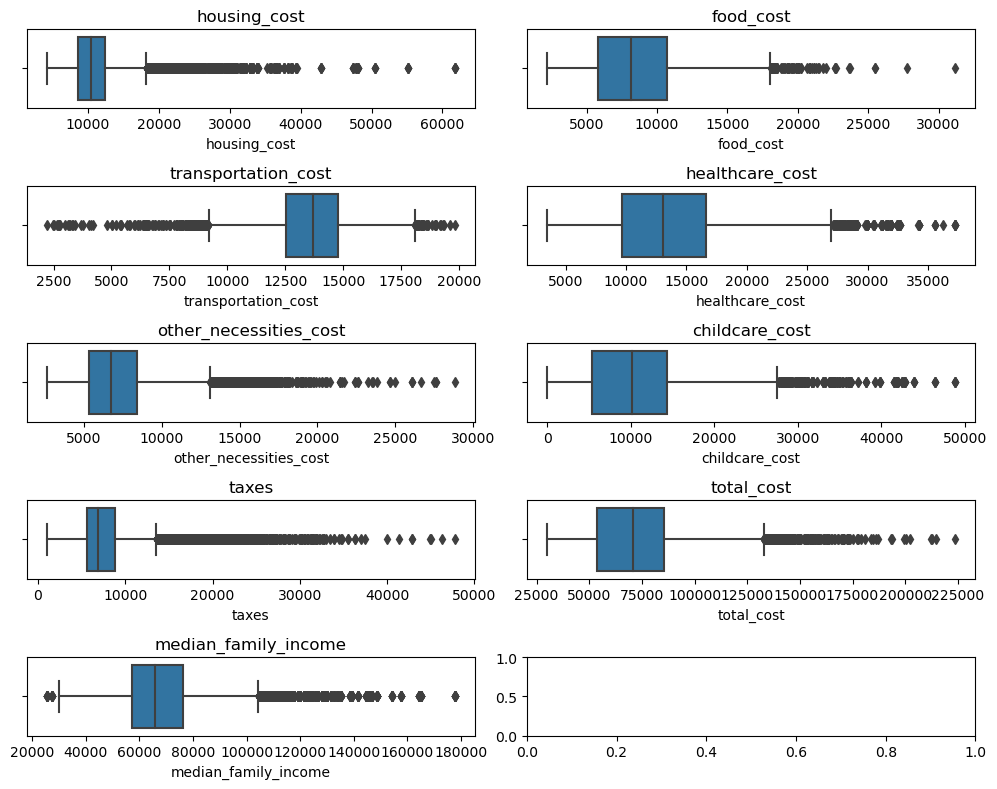

In [17]:
fig, axes = plt.subplots(5, 2, figsize=(10, 8))

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(column)
    
plt.tight_layout()
plt.show()

Looks like we have outliers. Let's handle them.

In [18]:
for column in df.select_dtypes(include=["int64", "float64"]).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

Let's check

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
housing_cost,31420.0,10794.237063,3179.116163,4209.311280,8580.000000,10416.000000,12444.000000,18240.000000
food_cost,31420.0,8283.001003,3253.911233,2220.276840,5801.424360,8129.156280,10703.624280,18056.924160
transportation_cost,31420.0,13603.512843,1599.858493,9189.209400,12535.204200,13698.315000,14765.867400,18111.862200
healthcare_cost,31420.0,13366.561336,5121.999405,3476.379960,9667.440000,13082.514000,16657.816800,27143.382000
other_necessities_cost,31420.0,6971.166373,2232.829121,2611.642080,5286.337290,6733.056120,8412.597480,13101.987765
childcare_cost,31420.0,9832.272469,6617.274918,0.000000,5341.208880,10166.340120,14272.137600,27668.530680
taxes,31420.0,7444.569809,2562.324042,1027.800756,5597.540100,6897.747780,8789.137950,13576.534725
total_cost,31420.0,70765.105435,21355.635845,30087.662400,53773.911300,70974.249000,85368.045300,132759.246300
median_family_income,31420.0,67761.715181,15101.410509,28855.865234,57223.988281,65955.605469,76136.070312,104504.193359


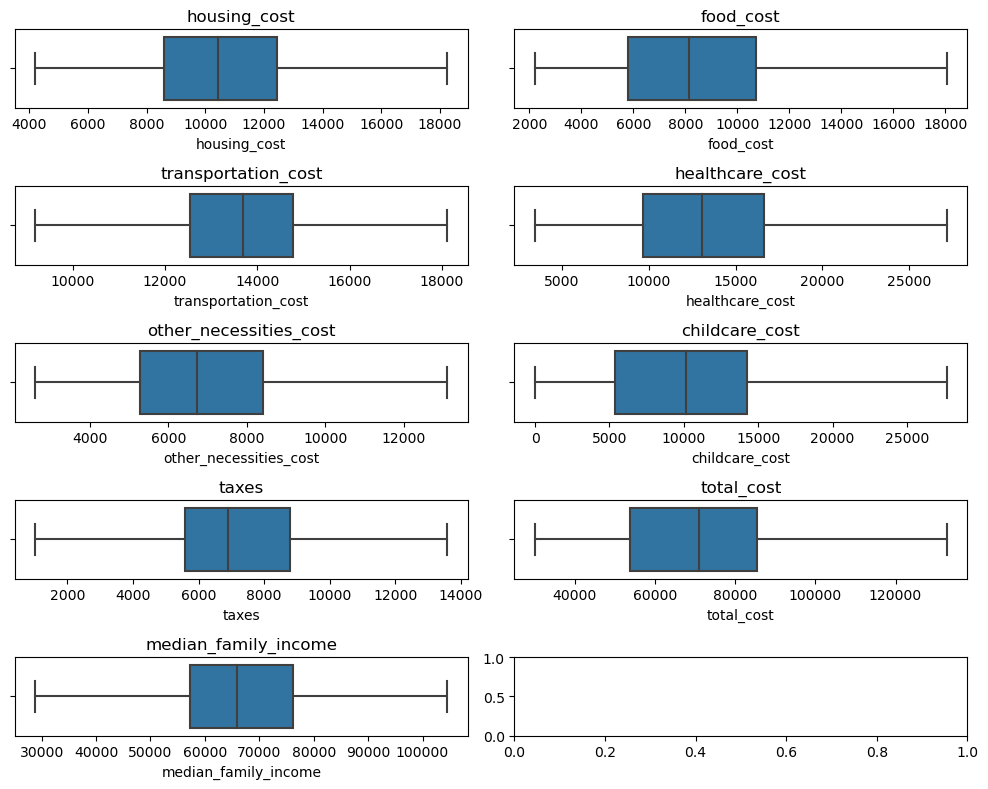

In [20]:
fig, axes = plt.subplots(5, 2, figsize=(10, 8))

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(column)
    
plt.tight_layout()
plt.show()

## Visual Analysis

In [21]:
df.dtypes

state                      object
isMetro                      bool
areaname                   object
county                     object
family_member_count        object
housing_cost              float64
food_cost                 float64
transportation_cost       float64
healthcare_cost           float64
other_necessities_cost    float64
childcare_cost            float64
taxes                     float64
total_cost                float64
median_family_income      float64
dtype: object

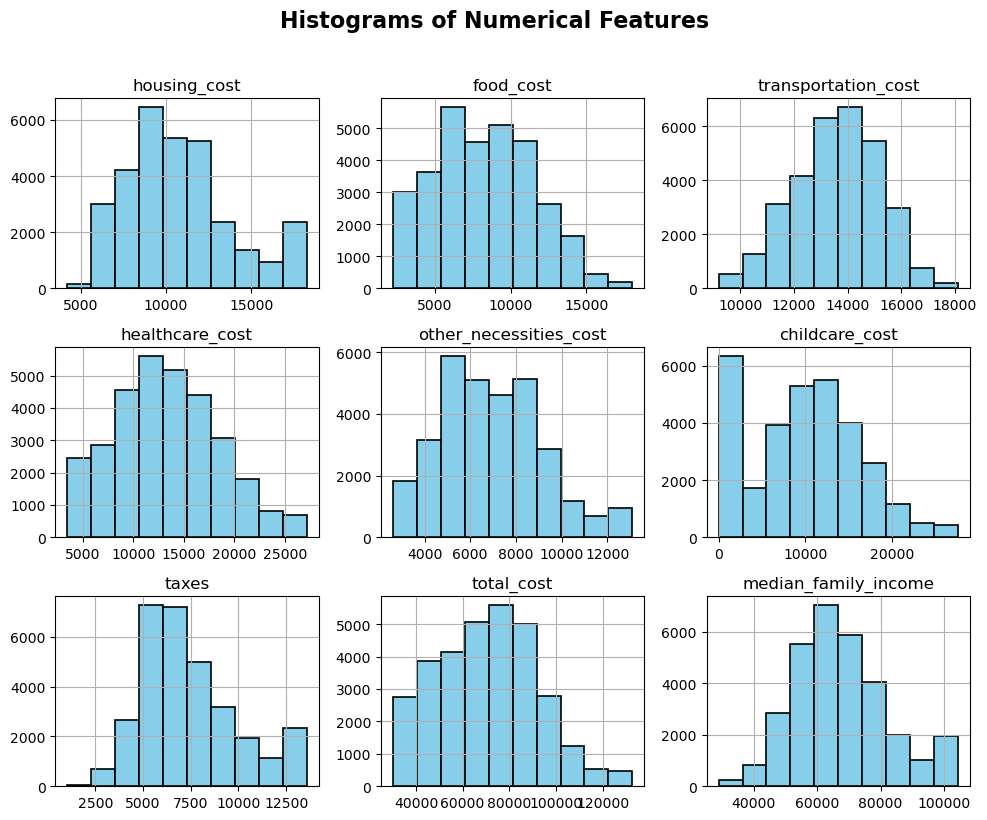

In [22]:
df.hist(figsize=(10, 8), color="skyblue", edgecolor="black", linewidth=1.2)
plt.suptitle("Histograms of Numerical Features", fontsize=16, fontweight="bold", y=1.02)

plt.tight_layout()
plt.show()

In [23]:
# Correlation

corr_matrix = df.select_dtypes(include=["int64", "float64"]).corr()
corr_cost_of_living = corr_matrix["total_cost"].sort_values(ascending=False)
corr_cost_of_living

total_cost                1.000000
other_necessities_cost    0.938102
food_cost                 0.901353
childcare_cost            0.884950
housing_cost              0.797455
healthcare_cost           0.763364
taxes                     0.734774
transportation_cost       0.666872
median_family_income      0.311330
Name: total_cost, dtype: float64

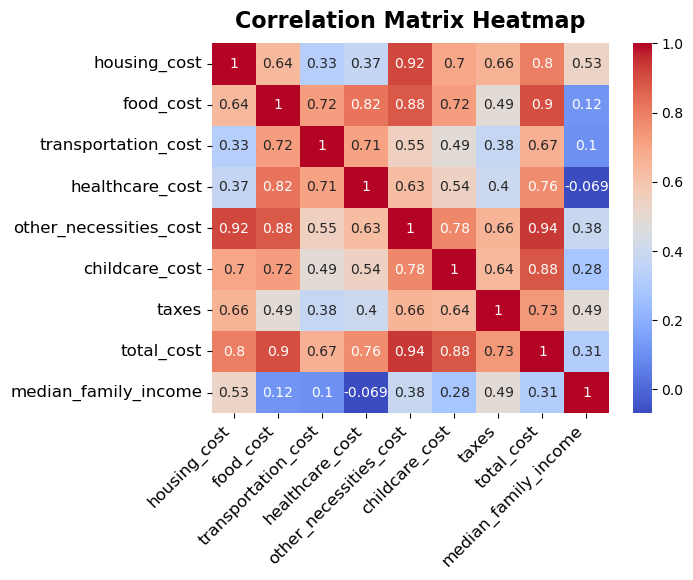

In [24]:
plt.figure()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", cbar=True)

plt.title("Correlation Matrix Heatmap", fontsize=16, fontweight="bold", y=1.02)
plt.xticks(rotation=45, fontsize=12, ha="right")
plt.yticks(rotation=0, fontsize=12)
plt.show()

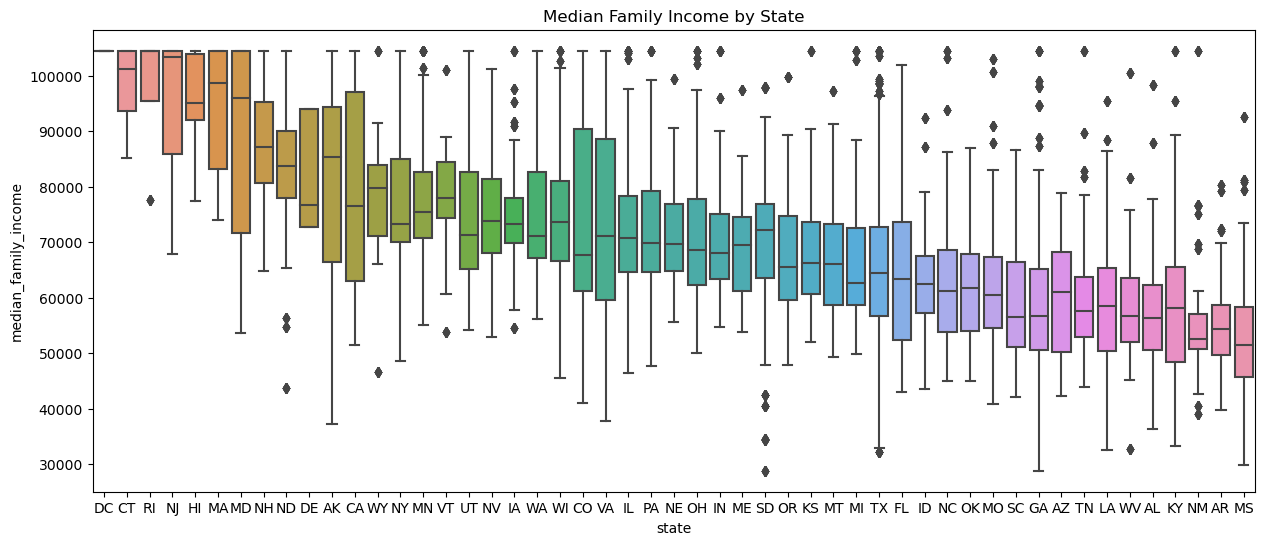

In [25]:
ordered_states = df.groupby("state")["median_family_income"].mean().sort_values(ascending=False).index

plt.figure(figsize=(15, 6))
sns.boxplot(df, x="state", y="median_family_income", order=ordered_states)
plt.title("Median Family Income by State")
plt.show()

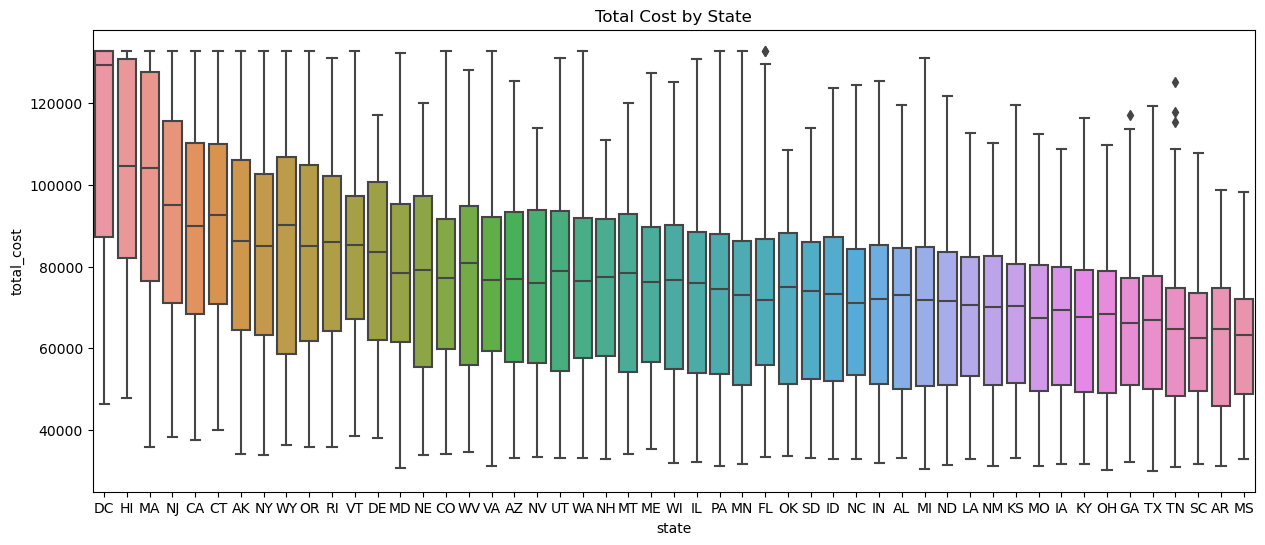

In [26]:
ordered_states = df.groupby("state")["total_cost"].mean().sort_values(ascending=False).index

plt.figure(figsize=(15, 6))
sns.boxplot(df, x="state", y="total_cost", order=ordered_states)
plt.title("Total Cost by State")
plt.show()

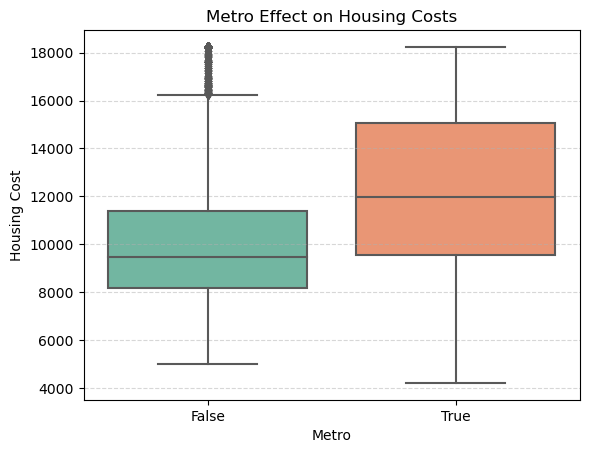

In [27]:
sns.boxplot(df, x="isMetro", y="housing_cost", palette="Set2")
plt.title("Metro Effect on Housing Costs")
plt.xlabel("Metro")
plt.ylabel("Housing Cost")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

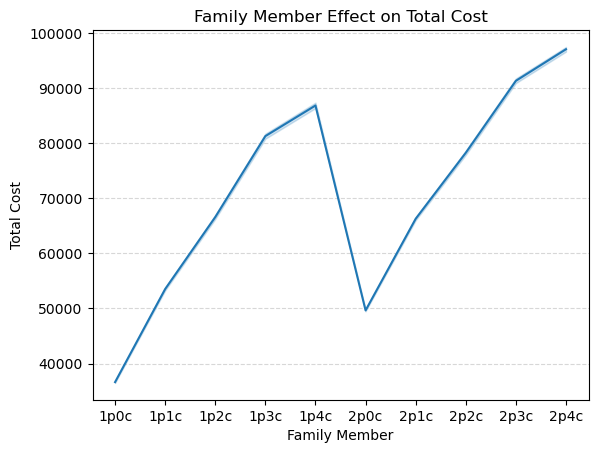

In [28]:
sns.lineplot(df, x="family_member_count", y="total_cost")
plt.title("Family Member Effect on Total Cost")
plt.xlabel("Family Member")
plt.ylabel("Total Cost")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

## Encoding

### Label Encoding

In [29]:
df.dtypes

state                      object
isMetro                      bool
areaname                   object
county                     object
family_member_count        object
housing_cost              float64
food_cost                 float64
transportation_cost       float64
healthcare_cost           float64
other_necessities_cost    float64
childcare_cost            float64
taxes                     float64
total_cost                float64
median_family_income      float64
dtype: object

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
encoder = LabelEncoder()
df["state_encoded"] = encoder.fit_transform(df["state"])

In [32]:
df.head()

,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,state_encoded
0,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062,1
1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062,1
2,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062,1
3,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062,1
4,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062,1


In [33]:
df["family_member_count_encoded"] = encoder.fit_transform(df["family_member_count"])

In [34]:
df.head()

,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,state_encoded,family_member_count_encoded
0,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062,1,0
1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062,1,1
2,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062,1,2
3,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062,1,3
4,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062,1,4


### Binary Encoding

In [35]:
df["isMetro_encoded"] = df["isMetro"].astype(int)

In [36]:
df["family_member_count"].value_counts()

family_member_count
1p0c    3142
1p1c    3142
1p2c    3142
1p3c    3142
1p4c    3142
2p0c    3142
2p1c    3142
2p2c    3142
2p3c    3142
2p4c    3142
Name: count, dtype: int64

In [37]:
df.head()

,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,state_encoded,family_member_count_encoded,isMetro_encoded
0,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062,1,0,1
1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062,1,1,1
2,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062,1,2,1
3,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062,1,3,1
4,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062,1,4,1


Let's drop object type columns.

In [38]:
df = df.drop(columns=["state", "isMetro", "areaname", "county", "family_member_count"])
df.head()

,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,state_encoded,family_member_count_encoded,isMetro_encoded
0,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062,1,0,1
1,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062,1,1,1
2,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062,1,2,1
3,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062,1,3,1
4,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062,1,4,1


In [39]:
df.dtypes

housing_cost                   float64
food_cost                      float64
transportation_cost            float64
healthcare_cost                float64
other_necessities_cost         float64
childcare_cost                 float64
taxes                          float64
total_cost                     float64
median_family_income           float64
state_encoded                    int32
family_member_count_encoded      int32
isMetro_encoded                  int32
dtype: object

## Modeling

First, let's split our dataset into and test sets.

In [40]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
y = df["total_cost"]
X = df.drop(columns=["total_cost"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now, we are going to model our dataset with different algorithms and find the best one.

### Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression

In [45]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

param_space = {
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'n_jobs': [1, 5, 10, 15, None],
    'positive': [True, False]
}

random_search_linear = RandomizedSearchCV(linear_model, param_space, n_iter=100, cv=5)
random_search_linear.fit(X_train, y_train)

print(f"Best Hyperparameters: {random_search_linear.best_params_}")

y_pred_linear = random_search_linear.best_estimator_.predict(X_test)

r2_linear = r2_score(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

print(f"\nLinear Model R2: {r2_linear:.2f}")
print(f"Linear Model RMSE: {rmse_linear:.2f}")

mape = np.mean(np.abs((y_test - y_pred_linear) / y_test)) * 100

print(f"\nMean Absolute Percentage Error (MAPE): {mape:.2f}%")

Best Hyperparameters: {'positive': False, 'n_jobs': 1, 'fit_intercept': False, 'copy_X': True}

Linear Model R2: 1.00
Linear Model RMSE: 1404.62

Mean Absolute Percentage Error (MAPE): 0.65%


We got a perfect R2 score but we need to check later if there is an overfitting issue with this model.

### Logistic Regression

In [53]:
from sklearn.linear_model import Ridge
from scipy.stats import uniform

In [55]:
ridge_model = Ridge()

param_space = {
    'alpha': uniform(loc=0.01, scale=10),
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
    'max_iter': [100, 500, 1000, 5000]
}

random_search_ridge = RandomizedSearchCV(
    estimator=ridge_model,
    param_distributions=param_space,
    n_iter=100,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    verbose=0,
    n_jobs=-1
)

random_search_ridge.fit(X_train, y_train)

print(f"Best Hyperparameters: {random_search_ridge.best_params_}")

y_pred_ridge = random_search_ridge.best_estimator_.predict(X_test)

r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print(f"\nRidge Model R2: {r2_ridge:.2f}")
print(f"Ridge Model RMSE: {rmse_ridge:.2f}")

mape = np.mean(np.abs((y_test - y_pred_ridge) / y_test)) * 100

print(f"\nMean Absolute Percentage Error (MAPE): {mape:.2f}%")

Best Hyperparameters: {'alpha': 9.666320330745593, 'max_iter': 500, 'solver': 'svd'}

Ridge Model R2: 1.00
Ridge Model RMSE: 1404.26


### Ridge Regression

### Lasso Regression

### ElasticNet Regression

### Random Forests